<a href="https://colab.research.google.com/github/subhprakash/Gold-reserve-prediction/blob/main/PROJECT(Country).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***FROM HERE STARTS THE MODEL FOR ALL THE COUNTRY






In [ ]:
# Import necessary libraries
import pandas as pd
from google.colab import files

# Upload the CSV file
uploaded = files.upload()

# Load the data into a DataFrame
file_name = list(uploaded.keys())[0]  # Get the uploaded file name
data = pd.read_csv(file_name)

# Clean the data: remove commas and convert the values to numeric
data_cleaned = data.copy()
for year in ['2024', '2023', '2022', '2021', '2020', '2019', '2018']:
    data_cleaned[year] = pd.to_numeric(data_cleaned[year].replace(',', '', regex=True), errors='coerce')

# Group by country and display the cleaned data for each country
countries = data_cleaned['Country'].unique()

for country in countries:
    country_data = data_cleaned[data_cleaned['Country'] == country]
    print(f"\nCleaned data for {country}:")
    print(country_data)


Saving Golden Thread - Sheet1.csv to Golden Thread - Sheet1 (1).csv

Cleaned data for United States:
         Country    2024    2023     2022     2021     2020     2019     2018
0  United States  8133.0  8133.5  8133.46  8133.47  8133.46  8133.46  8133.46

Cleaned data for Germany:
   Country    2024    2023     2022     2021     2020     2019     2018
1  Germany  3353.0  3354.9  3355.14  3359.09  3362.45  3366.49  3369.72

Cleaned data for Italy:
  Country    2024    2023     2022     2021     2020     2019     2018
2   Italy  2452.0  2451.8  2451.84  2451.84  2451.84  2451.84  2451.84

Cleaned data for France:
  Country    2024    2023     2022     2021     2020    2019     2018
3  France  2437.0  2436.8  2436.75  2436.47  2436.19  2436.0  2436.03

Cleaned data for Russia:
  Country    2024    2023     2022     2021     2020     2019     2018
4  Russia  2333.0  2326.5  2298.53  2301.64  2298.53  2271.16  2113.03

Cleaned data for China:
  Country    2024    2023     2022    2021    

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Load and clean data as before
data_cleaned = data.copy()
for year in ['2024', '2023', '2022', '2021', '2020', '2019', '2018']:
    data_cleaned[year] = pd.to_numeric(data_cleaned[year].replace(',', '', regex=True), errors='coerce')

# Define your features and target
X = data_cleaned[['2023', '2022', '2021', '2020', '2019', '2018']]  # past years as features
y = data_cleaned['2024']  # 2024 as the target

# Remove rows with NaN values in the features or target
X = X.dropna()
y = y[X.index]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check if there are sufficient samples in train and test
if len(X_test) > 1:
    # Train the regression model
    reg = LinearRegression()
    reg.fit(X_train, y_train)

    # Predictions
    y_pred = reg.predict(X_test)

    # Calculate Mean Squared Error (MSE) and R-squared score
    r2 = r2_score(y_test, y_pred)


    print(f"R-Squared: {r2}")

    # Handle case where R² is not defined
    if np.isnan(r2):
        print("R² is not well-defined for this dataset.")
else:
    print("Not enough samples in the test set to compute R² score.")


R-Squared: 0.9955301418994817


In [ ]:
from sklearn.linear_model import LinearRegression

# Prepare data
years = data_cleaned.columns[1:].astype(int).values.reshape(-1, 1)
predictions_2025 = {}

# Loop through countries and fit the model
for country in data_cleaned['Country']:
    reserves = data_cleaned[data_cleaned['Country'] == country].iloc[:, 1:].values.flatten()

    linear_model = LinearRegression()
    linear_model.fit(years, reserves)
    predicted_2025_linear = linear_model.predict([[2025]])

    # Store predictions
    predictions_2025[country] = {'Linear_Regression': predicted_2025_linear[0]}

# Print all predictions for Linear Regression
print("Linear Regression Predictions for 2025:")
for country, prediction in predictions_2025.items():
    print(f"{country}: {prediction['Linear_Regression']}")


Linear Regression Predictions for 2025:
United States: 8133.215714285713
Germany: 3348.591428571429
Italy: 2451.9142857142856
France: 2437.187142857143
Russia: 2387.568571428572
China: 2225.888571428557
Switzerland: 1040.0
Japan: 880.6114285714211
India: 870.4257142857095
Netherlands: 612.2142857142857
Turkey: 638.2614285714226
Taiwan: 424.00571428571436
Portugal: 382.84999999999997
Uzbekistan: 390.7900000000009
Poland: 332.0542857142864
Saudi Arabia: 323.04285714285714
United Kingdom: 310.1285714285714
Kazakhstan: 313.04857142857145
Lebanon: 286.9142857142857
Spain: 281.8285714285714
Austria: 280.0
Thailand: 282.7428571428609
Singapore: 238.03142857142666
Belgium: 227.17142857142858
Algeria: 173.80285714285714
Philippines: 145.16714285714443
Venezuela: 161.0857142857143
Libya: 133.971428571429
Iraq: 144.4499999999971
Brazil: 156.56714285714406
Egypt: 139.51142857142622
Sweden: 125.87142857142858
South Africa: 125.19285714285712
Mexico: 120.12571428571431
Greece: 114.53714285714287
Sou

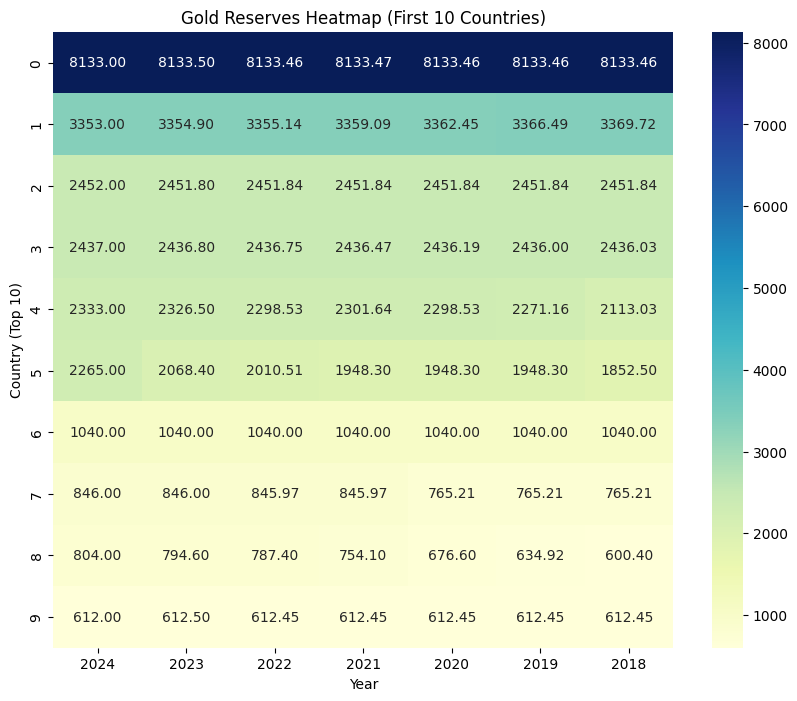

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the first 10 countries
heatmap_data_top_10 = data_cleaned.iloc[:10, 1:].apply(pd.to_numeric, errors='coerce')

# Check if any NaN values exist
if heatmap_data_top_10.isnull().values.any():
    print("Warning: NaN values found in the dataset, these will be shown as blank in the heatmap.")

# Create a heatmap for the first 10 countries
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data_top_10, cmap='YlGnBu', annot=True, fmt='.2f')

plt.title('Gold Reserves Heatmap (First 10 Countries)')
plt.xlabel('Year')
plt.ylabel('Country (Top 10)')
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Classify countries based on their past data
def decision_tree_classification(data):
    # Prepare the features (years 2018-2023) and target (2024)
    X = data_cleaned[['2018', '2019', '2020', '2021', '2022', '2023']]
    y = data_cleaned['2024'] > data_cleaned['2024'].median()  # Binary classification based on whether 2024 is above/below median

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the Decision Tree Classifier
    classifier = DecisionTreeClassifier()
    classifier.fit(X_train, y_train)

    # Predict
    y_pred = classifier.predict(X_test)

    accuracy = classifier.score(X_test, y_test)  # Accuracy of the classifier
    return accuracy

# Get accuracy of Decision Tree Classifier
decision_tree_accuracy = decision_tree_classification(data_cleaned)
print(f"Decision Tree Classifier Accuracy: {decision_tree_accuracy}")


Decision Tree Classifier Accuracy: 0.7


Decision Tree R-Squared: 0.9965853884396079


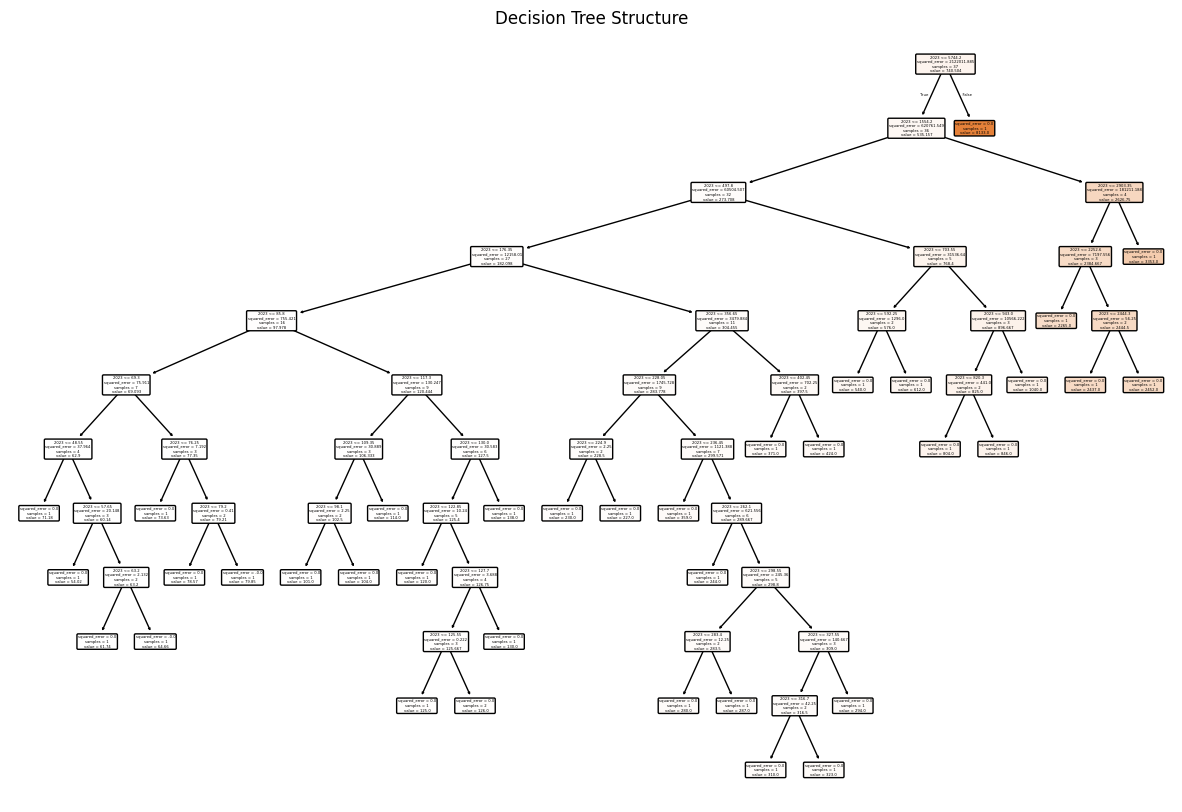

In [ ]:
# Import necessary libraries
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import pandas as pd

# Example data (replace with your actual 'data_cleaned' DataFrame)
# Assuming data_cleaned is already loaded and preprocessed
# Features and target
X = data_cleaned[['2023']]  # Use a single feature '2023'
y = data_cleaned['2024']    # Predicting for the year 2024

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Regressor
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)  # Fit the model

# Prediction
y_pred_tree = tree_model.predict(X_test)

# Calculate the R-Squared (R2)
r2_tree = r2_score(y_test, y_pred_tree)
print(f"Decision Tree R-Squared: {r2_tree}")

# Plot the decision tree structure
plt.figure(figsize=(15, 10))
plot_tree(tree_model, feature_names=['2023'], filled=True, rounded=True)
plt.title("Decision Tree Structure")
plt.show()
